# HW6_Assignment 1

### Skeleton notebook Xiaomeng Dong
### Net ID: xd515

### Clean the dataset

In [12]:
import geopandas as gpd
import pandas as pd
import pylab as pl
import os
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
nrg = pd.read_csv("https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD")

In [14]:
nrg.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [15]:
nrg = nrg.loc[:,['NYC Borough, Block, and Lot (BBL)', \
                 'Reported Property Floor Area (Building(s)) (ft²)', 'Site EUI(kBtu/ft2)']]
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Reported Property Floor Area (Building(s)) (ft²),Site EUI(kBtu/ft2)
0,1.000410e+09,918919,NaN
1,4.021460e+09,NaN,NaN
2,2.027620e+09,64200,NaN
3,1.006700e+09,NaN,NaN
4,2.048300e+09,50000,NaN


In [16]:
nrg.dtypes

NYC Borough, Block, and Lot (BBL)                   float64
Reported Property Floor Area (Building(s)) (ft²)     object
Site EUI(kBtu/ft2)                                   object
dtype: object

In [18]:
for column in nrg:
            nrg[column] = pd.to_numeric(nrg[column], errors='coerce')
nrg.columns = ['NYC Borough, Block, and Lot (BBL)', \
                 'Reported Property Floor Area (Building(s)) (ft²)', 'Site EUI(kBtu/ft2)']
print nrg.dtypes

NYC Borough, Block, and Lot (BBL)                   float64
Reported Property Floor Area (Building(s)) (ft²)    float64
Site EUI(kBtu/ft2)                                  float64
dtype: object


In [20]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa46e90ec50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa42627a8d0>]], dtype=object)

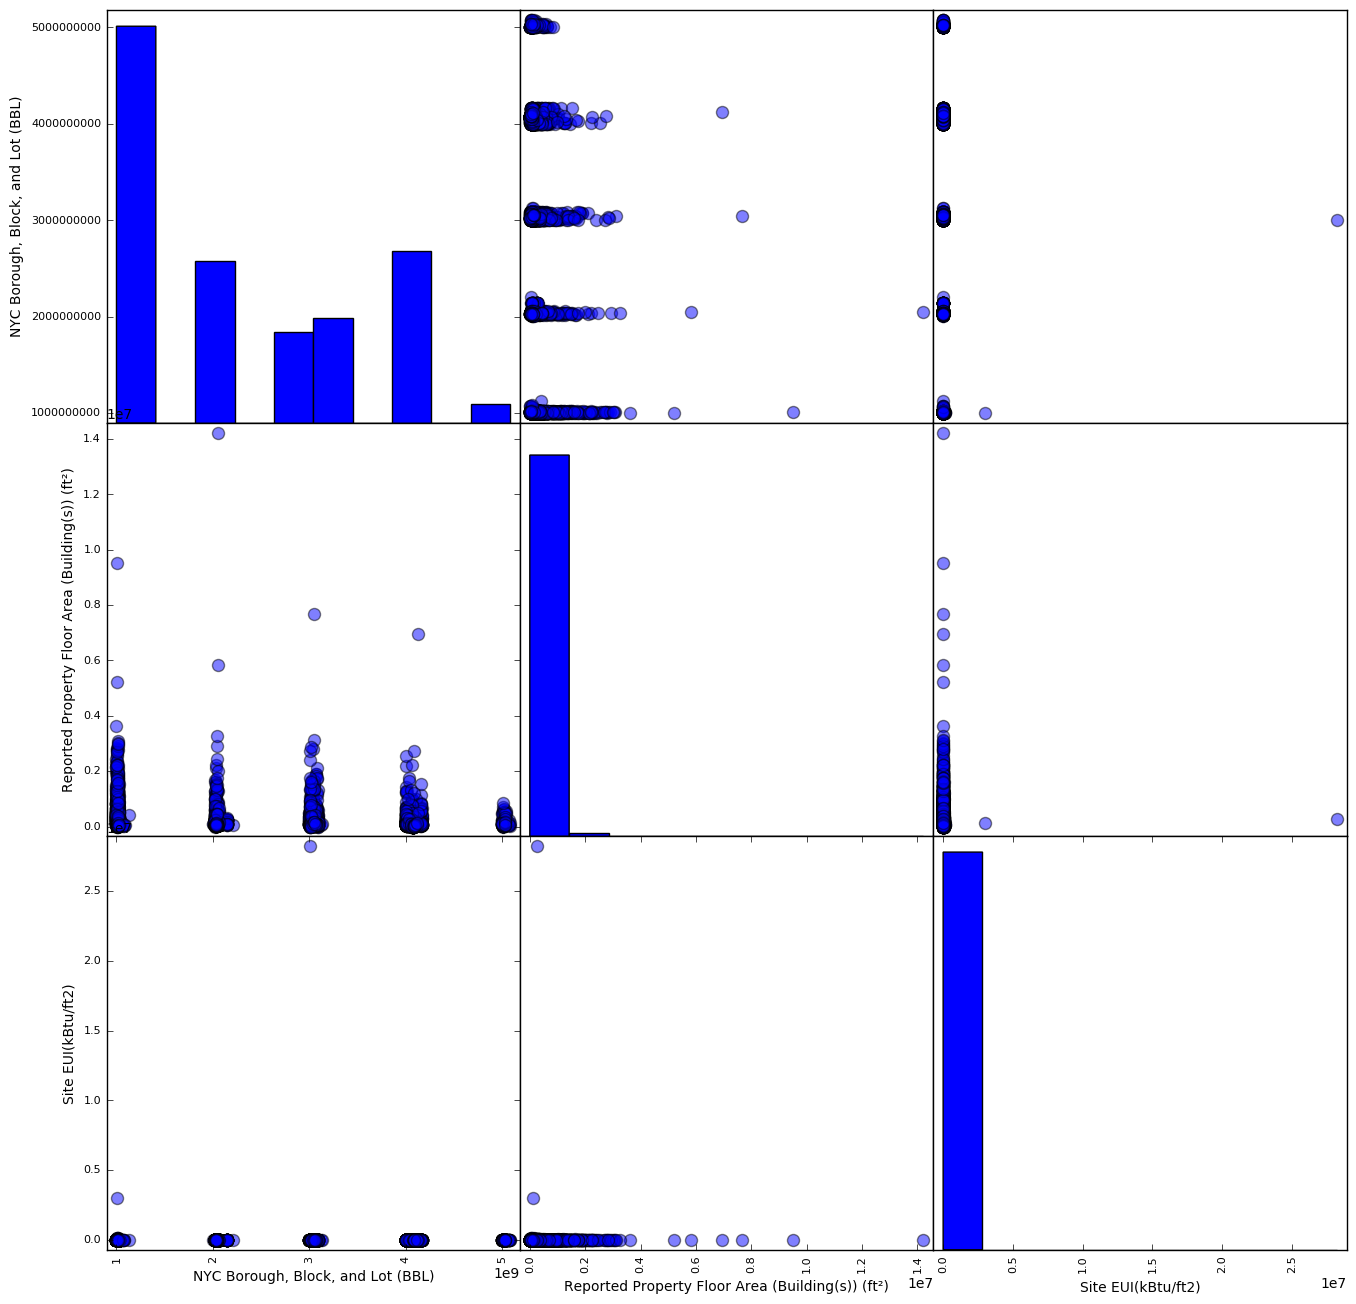

In [21]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

In [22]:
from DL import getzip
getzip()
bsize = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA")+"/Manhattan/MNMapPLUTO.shp")
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [31]:
bsize = bsize.loc[:,['UnitsRes', 'UnitsTotal', 'BBL']]
bsize.head()
bsize.dtypes

UnitsRes        int64
UnitsTotal      int64
BBL           float64
dtype: object

In [34]:
for column in bsize:
            bsize[column] = pd.to_numeric(bsize[column], errors='coerce')
bsize.columns = ['UnitsRes', 'UnitsTotal', 'BBL']
bsize.dtypes

UnitsRes        int64
UnitsTotal      int64
BBL           float64
dtype: object

### Merge the dataset

In [35]:
nrg.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)

In [36]:
df = nrg.merge(bsize, how='inner', on='BBL')
print len(df)
print df.columns

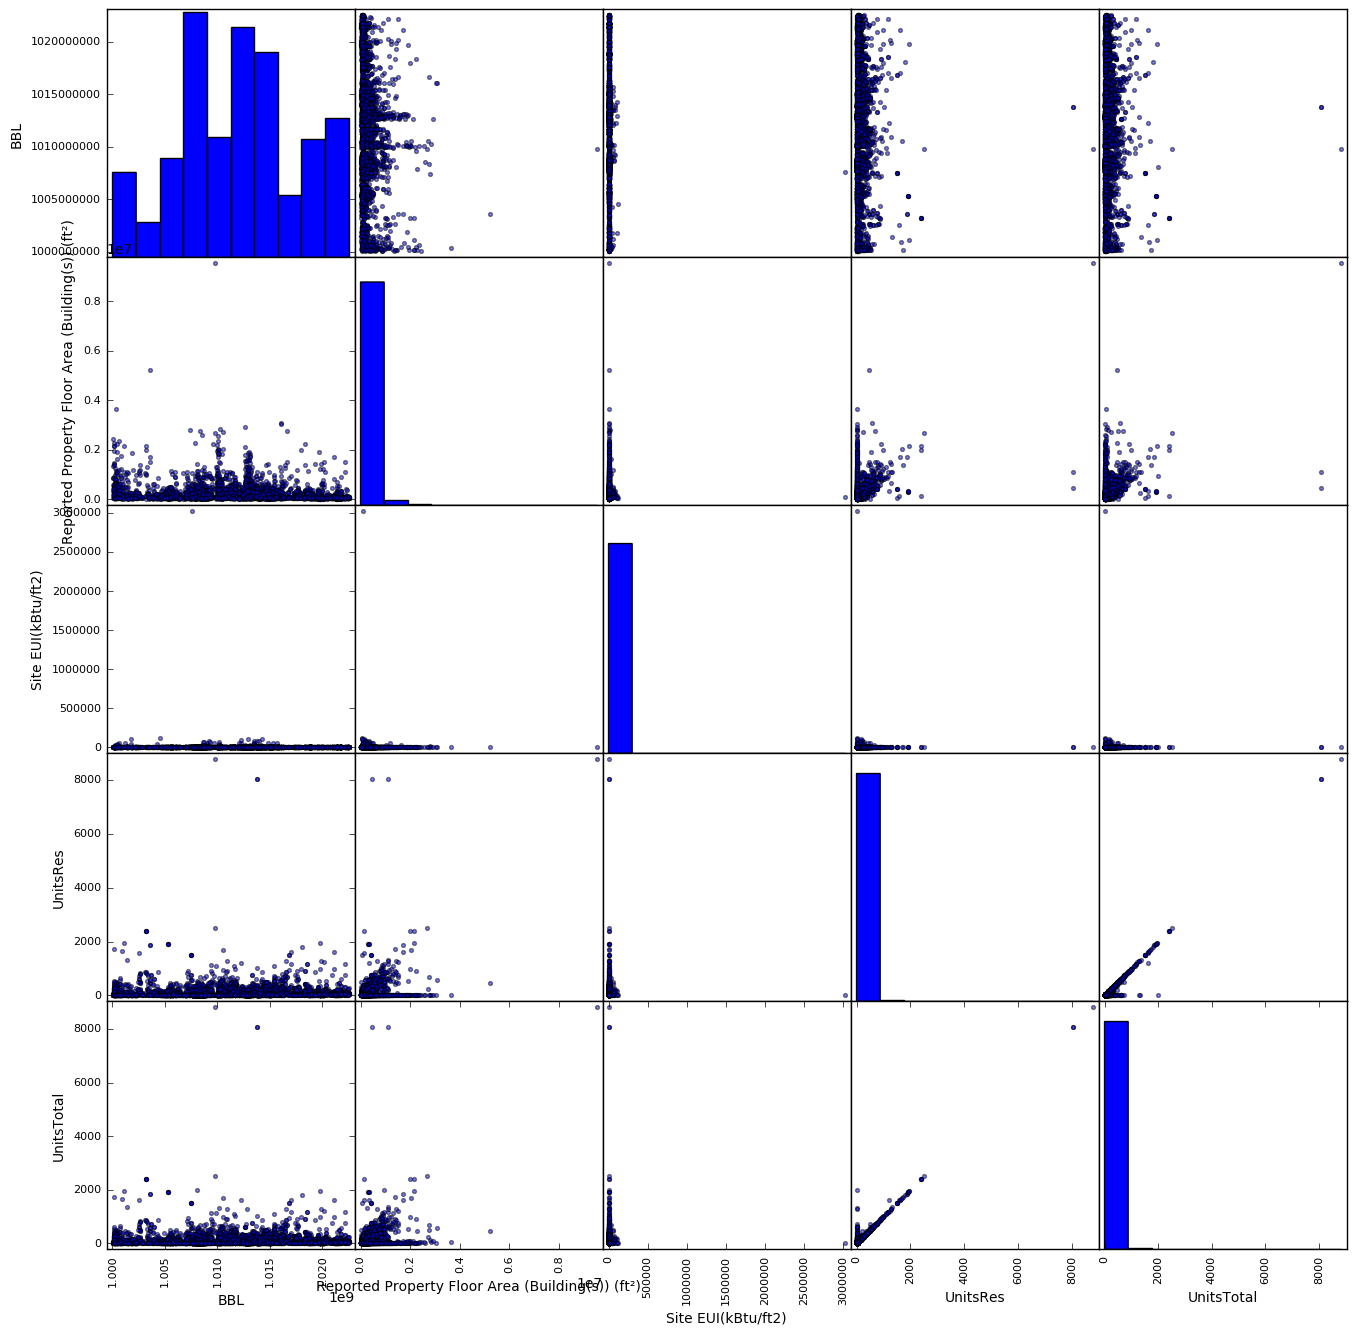

In [37]:
scatter_matrix(df, s=30, figsize=(16, 16))
plt.show()

### Visualizing the dataset

In [38]:
df['EnergyTotal'] = df['Site EUI(kBtu/ft2)'] * \
df['Reported Property Floor Area (Building(s)) (ft²)']

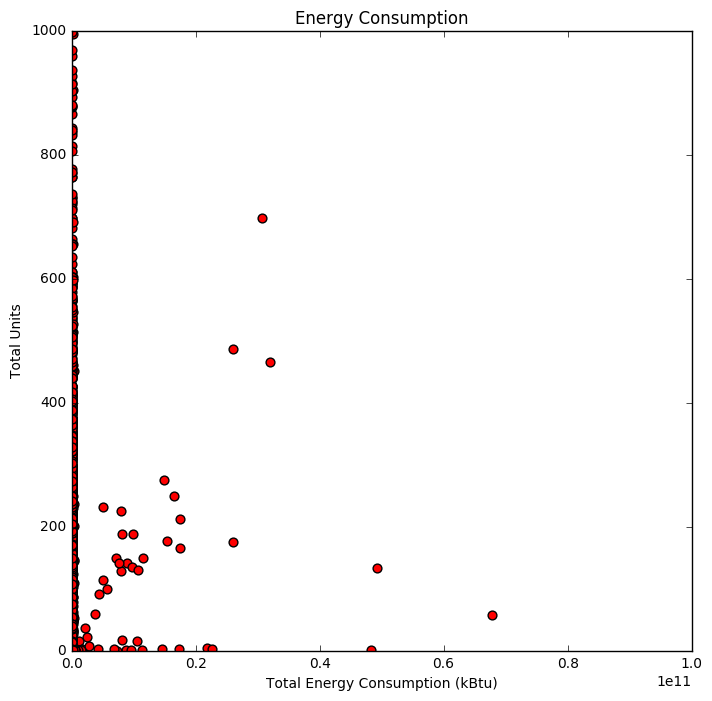

In [39]:
ax = plt.figure(figsize = (8, 8)).add_subplot(111)
plt.scatter(df["EnergyTotal"], df["UnitsTotal"], c = "r", s = 40)
ax.set_xlim(0, 1e11); ax.set_ylim(0, 1000)
plt.xlabel("Total Energy Consumption (kBtu)"); plt.ylabel("Total Units")
plt.title("Energy Consumption", fontsize = 12)
plt.show()

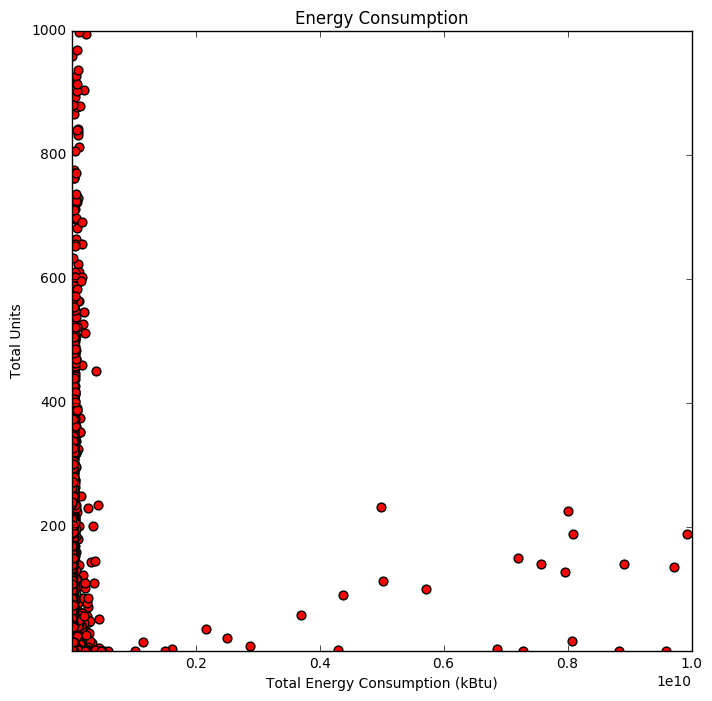

In [40]:
ax = plt.figure(figsize = (8, 8)).add_subplot(111)
plt.scatter(df["EnergyTotal"], df["UnitsTotal"], c = "r", s = 40)
ax.set_xlim(1000, 1e10); ax.set_ylim(1,1000)
plt.xlabel("Total Energy Consumption (kBtu)"); plt.ylabel("Total Units")
plt.title("Energy Consumption")
plt.show()

In [41]:
df_cut = df[(df.EnergyTotal > 1) & (df.EnergyTotal <= 200)]
df_cut = df[(df.UnitsTotal > 10) & (df.UnitsTotal <= 1000)]

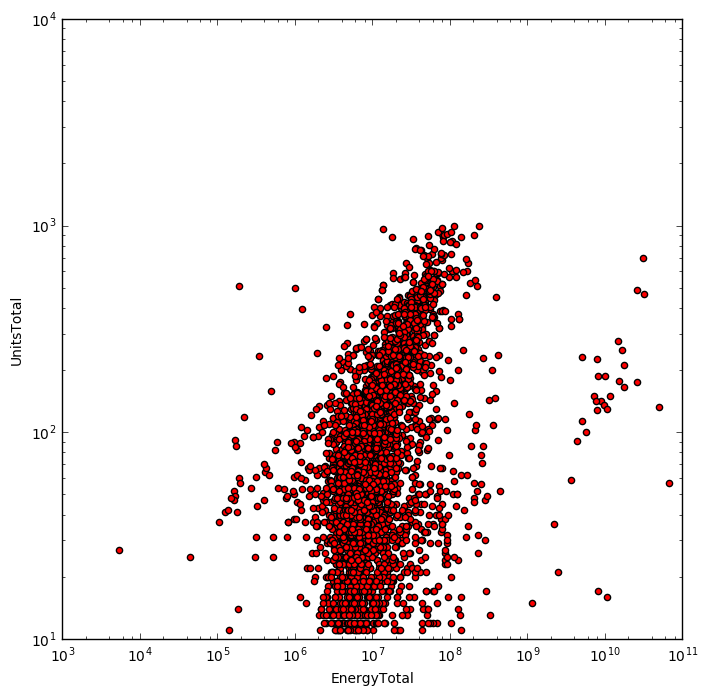

In [42]:
fig = df_cut.plot(x = "EnergyTotal", \
                  y = "UnitsTotal", loglog = True, kind = "scatter", \
                  c = "r", figsize = (8,8))

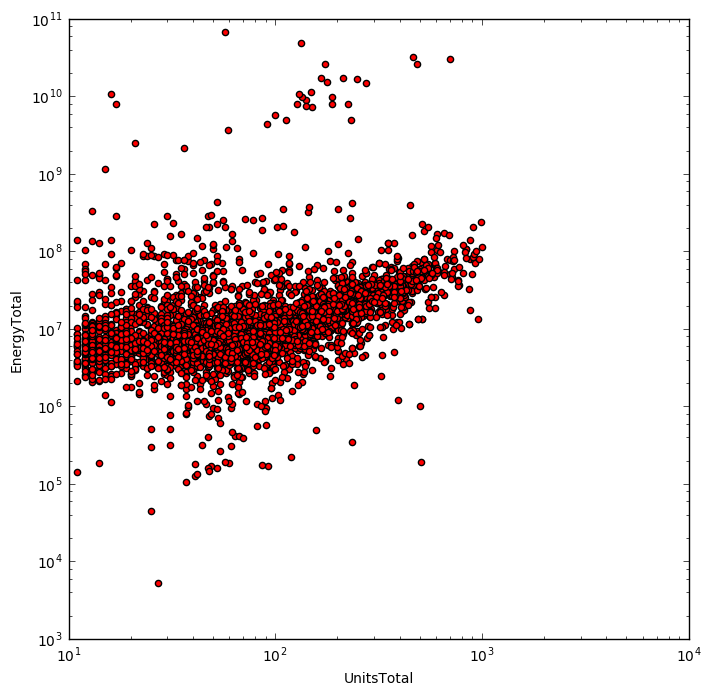

In [43]:
fig = df_cut.plot(y = "EnergyTotal", x = "UnitsTotal", loglog = True, kind = "scatter", \
                  c = "r", figsize = (8,8))

### Medeling the data

In [53]:
df_cut["logEnergyTotal"] = np.log(df_cut["EnergyTotal"])
df_cut["logUnitsTotal"] = np.log(df_cut["UnitsTotal"])

In [54]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = "logEnergyTotal ~ logUnitsTotal", data = df_cut).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         logEnergyTotal   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     848.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.23e-170
Time:                        20:25:18   Log-Likelihood:                -6066.0
No. Observations:                4237   AIC:                         1.214e+04
Df Residuals:                    4235   BIC:                         1.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        14.0025      0.077    182.547      0.000        13.852    14.153
logUnitsTotal     0.5024      0.017     29.121      0.000         0.469     0.536
==============================================================================
Omnibus:                     2273.853   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46297.723
Skew:                           2.111   Prob(JB):                         0.00
Kurtosis:                      18.634   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lm2 = smf.ols(formula = "logUnitsTotal ~ logEnergyTotal", data = df_cut).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          logUnitsTotal   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     848.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.23e-170
Time:                        20:25:21   Log-Likelihood:                -5188.7
No. Observations:                4237   AIC:                         1.038e+04
Df Residuals:                    4235   BIC:                         1.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.0225      0.185     -5.526      0.000        -1.385    -0.660
logEnergyTotal     0.3321      0.011     29.121      0.000         0.310     0.354
==============================================================================
Omnibus:                      130.662   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.961
Skew:                          -0.431   Prob(JB):                     9.05e-32
Kurtosis:                       3.261   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fit a line